## Observations and Insights 

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_results = pd.merge(mouse_metadata, study_results,how ='outer', on ="Mouse_ID" )
# Display the data table for preview
mouse_study_results.head()

#df = pd.DataFrame(mouse_study_results)

#print(df)

#Study Observations
#1. I noticed that the larger the subject in weight the larger the tumor volume based on high correlation values
#2. Young Male subjects that used Nafitol were ineffective due to tumor volume
#3. Capolumin proves to be the highest tested drug and should be concluded with confidence.

In [16]:
# Create Dataframe
mousedf = pd.DataFrame(mouse_study_results)
print(mousedf)

     Mouse_ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor_Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [17]:
# Checking the number of mice.
mice_count= mouse_study_results.nunique()
mice_count.head()

Mouse_ID        249
Drug Regimen     10
Sex               2
Age_months       24
Weight (g)       16
dtype: int64

In [18]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicateRows = mousedf[mousedf.duplicated(['Mouse_ID', 'Timepoint'])]
print(duplicateRows)

    Mouse_ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor_Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 



In [24]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#newdf = mousedf[mousedf.Mouse_ID != 'g989']
#print(newdf)

newdf = mousedf.drop(mousedf[mousedf["Mouse_ID"]=="g989"].index)
newdf

,Mouse_ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Checking the number of mice in the clean DataFrame.
new_mice_count= newdf.nunique()
new_mice_count.head()

Mouse_ID        248
Drug Regimen     10
Sex               2
Age_months       24
Weight (g)       16
dtype: int64

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary_stat_grouped = newdf.groupby(["Drug Regimen"])

summary_stat_grouped_mean = summary_stat_grouped["Tumor_Volume (mm3)"].mean()

summary_stat_grouped_median = summary_stat_grouped["Tumor_Volume (mm3)"].median()

summary_stat_grouped_variance = summary_stat_grouped["Tumor_Volume (mm3)"].var()

summary_stat_grouped_std = summary_stat_grouped["Tumor_Volume (mm3)"].std()

summary_stat_grouped_sem = summary_stat_grouped["Tumor_Volume (mm3)"].sem()

summary_stat_grouped_stats = pd.DataFrame({ "Mean": summary_stat_grouped_mean,
                                            "Median": summary_stat_grouped_median,
                                            "Variance":summary_stat_grouped_variance,
                                            "Stnrd Dev": summary_stat_grouped_std,
                                            "SEM": summary_stat_grouped_sem})

print("--------------------","Total Drug Regimen Stats","--------------------")
print(summary_stat_grouped_stats)

-------------------- Total Drug Regimen Stats --------------------
                   Mean     Median   Variance  Stnrd Dev       SEM
Drug Regimen                                                      
Capomulin     40.675741  41.557809  24.947764   4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177   6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684   6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577   8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479   8.134708  0.596466
Placebo       54.033581  52.288934  61.168083   7.821003  0.581331
Propriva      52.320930  50.446266  43.852013   6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704   4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562   7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355   6.966589  0.516398


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stat_grouped = newdf.groupby(["Drug Regimen"])

summary_stat_grouped_mean = summary_stat_grouped["Tumor_Volume (mm3)"].mean()

summary_stat_grouped_mean
#summary_stat_grouped_median = summary_stat_grouped["Tumor_Volume (mm3)"].median()

#summary_stat_grouped_variance = summary_stat_grouped["Tumor_Volume (mm3)"].var()

#summary_stat_grouped_std = summary_stat_grouped["Tumor_Volume (mm3)"].std()

#summary_stat_grouped_sem = summary_stat_grouped["Tumor_Volume (mm3)"].sem()

#summary_stat_grouped_stats = pd.DataFrame({ "Mean": summary_stat_grouped_mean,
                                           # "Median": summary_stat_grouped_median,
                                           # "Variance":summary_stat_grouped_variance,
                                           # "Stnrd Dev": summary_stat_grouped_std,
                                           # "SEM": summary_stat_grouped_sem})
# Using the aggregation method, produce the same summary statistics in a single line

#aggregate_df = pd


Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor_Volume (mm3), dtype: float64

## Bar and Pie Charts

<AxesSubplot:title={'center':'Total Timepoints'}, xlabel='Drug Regimen', ylabel='Time Points'>

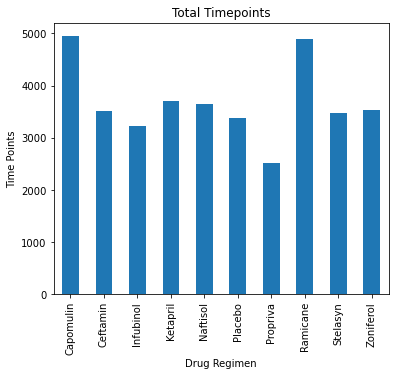

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

barplotdf = newdf.groupby(['Drug Regimen'])['Timepoint'].sum()

barplotdf.plot(kind='bar', title = 'Total Timepoints', ylabel = 'Time Points', xlabel = 'Drug Regimen', figsize=(6,5))

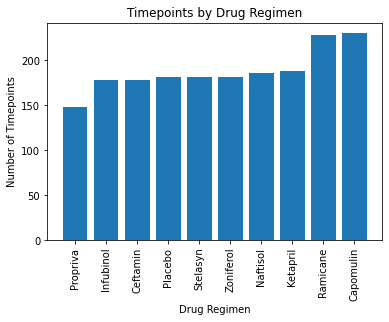

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#barplotdf = newdf.groupby(['Mouse_ID'])['Timepoint'].sum()

#barplotdf.plot(kind='bar', title = 'Total Timepoints', ylabel = 'Time Points', xlabel = 'Drug Regimen', figsize=(6,5))

matplotlib_bar = newdf["Drug Regimen"].value_counts().sort_values(ascending=True)
plt.bar(matplotlib_bar.index,matplotlib_bar.values)
plt.xticks(rotation="vertical")
plt.xlabel ("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.title("Timepoints by Drug Regimen")
plt.show()


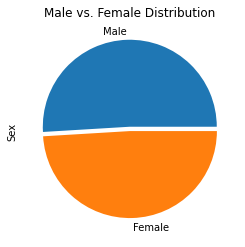

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = newdf["Sex"].value_counts()

mice_pie = gender.plot(kind="pie",explode=(0.05,0),
                              title="Male vs. Female Distribution")
plt.show()


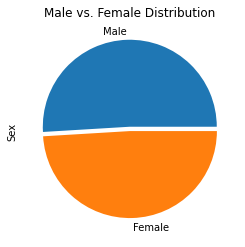

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = newdf["Sex"].value_counts()
matplotlib_pie = plt.pie(gender,labels = ["Male", "Female"],explode=(0.05,0))                       
plt.ylabel('Sex')
plt.title("Male vs. Female Distribution")
plt.show()

## Quartiles, Outliers and Boxplots

In [41]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
largesttimepoint = pd.DataFrame(newdf.groupby("Mouse_ID")['Timepoint'].max())

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
currenttimepoint = pd.merge(newdf,largesttimepoint,on=('Mouse_ID','Timepoint'))
currenttimepoint

,Mouse_ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [46]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

#Loop through each drug in the treatment list, locating the rows in the merged DataFrame that correspond to each treatment.

for regimen in treatments:
    drugloop = currenttimepoint.loc[currenttimepoint['Drug Regimen'] == regimen]
    
#Append the resulting final tumor volumes for each drug to the empty list.
    tumor_vol_data.append(drugloop ['Tumor_Volume (mm3)'])
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = drugloop["Tumor_Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
# Determine outliers using upper and lower bounds
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(regimen)
    print(f"Lower quartile: {lowerq}")
    print(f"Upper quartile: {upperq}")
    print(f"IQR: {iqr}")
    print(f"Lower bound outlier {lower_bound}.")
    print(f"Upper bound outlier {upper_bound}.")
    print("\n")

Capomulin
Lower quartile: 32.37735684
Upper quartile: 40.1592203
IQR: 7.781863460000004
Lower bound outlier 20.70456164999999.
Upper bound outlier 51.83201549.


Ramicane
Lower quartile: 31.56046955
Upper quartile: 40.65900627
IQR: 9.098536719999998
Lower bound outlier 17.912664470000003.
Upper bound outlier 54.30681135.


Infubinol
Lower quartile: 54.04860769
Upper quartile: 65.52574285
IQR: 11.477135160000003
Lower bound outlier 36.83290494999999.
Upper bound outlier 82.74144559000001.


Ceftamin
Lower quartile: 48.72207785
Upper quartile: 64.29983003
IQR: 15.577752179999997
Lower bound outlier 25.355449580000002.
Upper bound outlier 87.66645829999999.




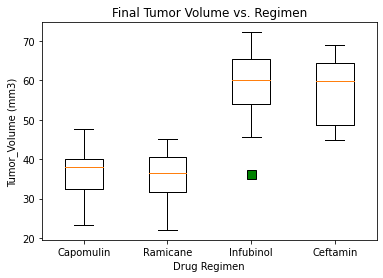

In [52]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots()
flierprops = dict(marker='s',markerfacecolor='g', markersize = 9)
plt.boxplot(tumor_vol_data,flierprops=flierprops)
ax.set_xticklabels(treatments)
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Tumor_Volume (mm3)")
ax.set_title("Final Tumor Volume vs. Regimen")
plt.show()

## Line and Scatter Plots

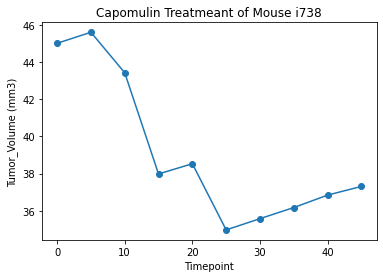

In [53]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_mouse = newdf.loc[newdf['Mouse_ID'] == "i738"]
plt.plot(cap_mouse["Timepoint"], cap_mouse["Tumor_Volume (mm3)"],marker = 'o')
plt.title("Capomulin Treatment")
plt.xlabel("Timepoint")
plt.ylabel("Tumor_Volume (mm3)")
plt.show()

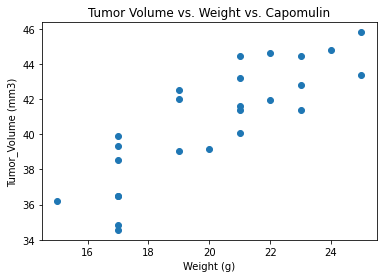

In [57]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = newdf.loc[newdf["Drug Regimen"] == "Capomulin"]
capomulin_df_grouped = capomulin_df.groupby("Mouse_ID").mean()
plt.scatter(capomulin_df_grouped["Weight (g)"], capomulin_df_grouped["Tumor_Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Tumor_Volume (mm3)")
plt.title("Tumor Volume vs. Weight vs. Capomulin")
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84.


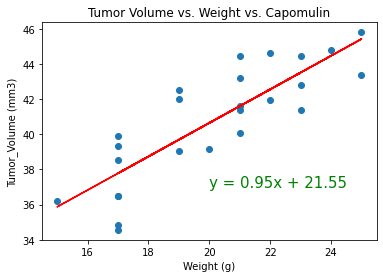

In [61]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(capomulin_df_grouped["Weight (g)"],capomulin_df_grouped["Tumor_Volume (mm3)"])
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}.")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_df_grouped["Weight (g)"], capomulin_df_grouped["Tumor_Volume (mm3)"])
regress_values =  capomulin_df_grouped["Weight (g)"]* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(capomulin_df_grouped["Weight (g)"],capomulin_df_grouped["Tumor_Volume (mm3)"])
plt.plot(capomulin_df_grouped["Weight (g)"],regress_values,"r-")
plt.annotate(line_eq,(20,37),fontsize=15,color="green")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor_Volume (mm3)")
plt.title("Tumor Volume vs. Weight vs. Capomulin")
plt.show()